<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Gradient_Descent(All_types).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a function. In machine learning, it's commonly used to minimize the cost (or loss) function of a model by iteratively moving in the direction of the steepest descent, which is given by the negative of the gradient of the function. The goal is to find the parameters (weights and biases) of the model that result in the lowest cost.

### 1. Batch Gradient Descent (BGD)

**Concept:** Batch Gradient Descent calculates the gradient of the loss function with respect to the parameters for the entire training dataset. All training examples are considered at once to perform a single update.

**Pros:**
*   **Stable Convergence:** Provides a stable error gradient and stable convergence.
*   **Guaranteed Convergence (Convex):** For convex error surfaces, it's guaranteed to converge to the global minimum.
*   **Efficient Computation:** Can use highly optimized matrix operations.

**Cons:**
*   **Slow for Large Datasets:** Computing the gradient over the entire dataset can be very slow and computationally expensive for large datasets.
*   **Memory Intensive:** Requires loading the entire dataset into memory.
*   **Can Get Stuck (Non-Convex):** Can get stuck in local minima for non-convex error surfaces.

### 2. Stochastic Gradient Descent (SGD)

**Concept:** Stochastic Gradient Descent calculates the gradient and updates the parameters for each individual training example. It performs a parameter update for *each* data point.

**Pros:**
*   **Faster Updates:** Much faster than BGD, especially for large datasets, as it performs updates more frequently.
*   **Can Escape Local Minima:** The noisy updates (due to individual examples) can help it escape shallow local minima in non-convex loss functions.
*   **Less Memory:** Does not require the entire dataset to be loaded into memory.

**Cons:**
*   **Noisy Updates:** The frequent updates based on single examples lead to noisy gradients and oscillations around the minimum, making it harder to converge precisely.
*   **Slower Convergence (Sometimes):** While individual updates are fast, it might take more iterations to converge to a good solution due to the oscillations.
*   **Higher Variance:** The updates have high variance.

### 3. Mini-Batch Gradient Descent (MBGD)

**Concept:** Mini-Batch Gradient Descent is a compromise between Batch Gradient Descent and Stochastic Gradient Descent. It calculates the gradient and updates the parameters for a small 'mini-batch' of training examples, rather than the entire dataset or a single example.

**Pros:**
*   **Balance:** Offers a good balance between the stability of BGD and the efficiency of SGD.
*   **Efficient Computation:** Can leverage vectorization for efficient computation over mini-batches.
*   **Smoother Convergence:** Reduces the variance of the parameter updates compared to SGD, leading to more stable convergence.
*   **Memory Management:** More memory-efficient than BGD.

**Cons:**
*   **Batch Size Tuning:** Requires tuning an additional hyperparameter: the mini-batch size.
*   **Can Get Stuck (Local Minima):** While better than BGD, it can still get stuck in local minima, although less likely than BGD.

### Comparison Summary

| Feature           | Batch Gradient Descent (BGD)     | Stochastic Gradient Descent (SGD)    | Mini-Batch Gradient Descent (MBGD)   |
| :---------------- | :------------------------------- | :----------------------------------- | :----------------------------------- |
| **Data Used**     | Entire training dataset          | Single training example              | Small subset (mini-batch)            |
| **Update Freq.**  | Once per epoch                   | Once per training example            | Once per mini-batch                  |
| **Update Type**   | Smooth, stable                   | Noisy, high variance                 | Moderately noisy, lower variance     |
| **Convergence**   | Stable, can be slow              | Fast updates, but oscillates         | Faster and more stable than SGD      |
| **Memory**        | High (entire dataset)            | Low (single example)                 | Moderate (mini-batch)                |
| **Speed**         | Slow for large datasets          | Fast for large datasets              | Good balance, usually fastest        |
| **Local Minima**  | Prone to getting stuck           | Can escape                            | Less prone than BGD                  |
| **Hyperparams**   | Learning Rate                    | Learning Rate                         | Learning Rate, Batch Size            |

**Conclusion:** Mini-Batch Gradient Descent is generally the preferred choice in practice due to its efficiency and stability, combining the best aspects of both Batch and Stochastic Gradient Descent.

This code cell sets up the environment and defines the target function for optimization. It imports `numpy` for numerical operations and `matplotlib.pyplot` for plotting. The `func(x)` defines the quadratic equation $f(x) = x^2 - 4x + 5$, which we aim to minimize. The `gradient(x)` function computes the derivative of `func(x)`, which is essential for gradient descent. Finally, it generates points and plots the function to visualize its shape and confirm its minimum.

This cell implements Batch Gradient Descent (BGD) for our defined quadratic function. It initializes `x_bgd` (our starting point for optimization), a `learning_rate_bgd` (controlling the step size), and the number of `iterations_bgd`. In each iteration, it calculates the gradient of the function at the current `x_bgd` using the `gradient` function, and then updates `x_bgd` by moving in the opposite direction of the gradient, scaled by the learning rate. The history of `x` and `f(x)` values is recorded to visualize the optimization path, which is then plotted over the function. The print statements show the progress and the final optimized value.

This cell demonstrates Stochastic Gradient Descent (SGD). Similar to BGD, it initializes `x_sgd`, `learning_rate_sgd`, and `iterations_sgd`. The key difference here is how the gradient is calculated: to simulate the effect of using a single data point (and its inherent noise) from a larger dataset, Gaussian noise is added to the true gradient. This noisy gradient is then used to update `x_sgd`. This leads to more frequent but often more erratic updates, as seen in the plotted optimization path. The history is recorded and plotted to show how SGD navigates the search space.

This cell implements Mini-Batch Gradient Descent (MBGD), which is a hybrid approach. It initializes `x_mbgd`, `learning_rate_mbgd`, `iterations_mbgd`, and crucially, `mini_batch_size`. In each iteration, instead of using the entire dataset's gradient (like BGD) or a single noisy point's gradient (like SGD), it simulates taking a small `mini_batch_size` of data points. For each point in the mini-batch, a noisy gradient is calculated (with less noise than in the SGD example to reflect an average over a few points). These noisy gradients are then averaged, and this `grad_average` is used to update `x_mbgd`. This approach offers a balance between the stability of BGD and the efficiency of SGD, as observed in its plotted optimization path.

Let's start by defining a simple quadratic function and its gradient to demonstrate the concepts. We'll use a 1D function for simplicity.

$f(x) = x^2 - 4x + 5$

The gradient is:

$\frac{df}{dx} = 2x - 4$

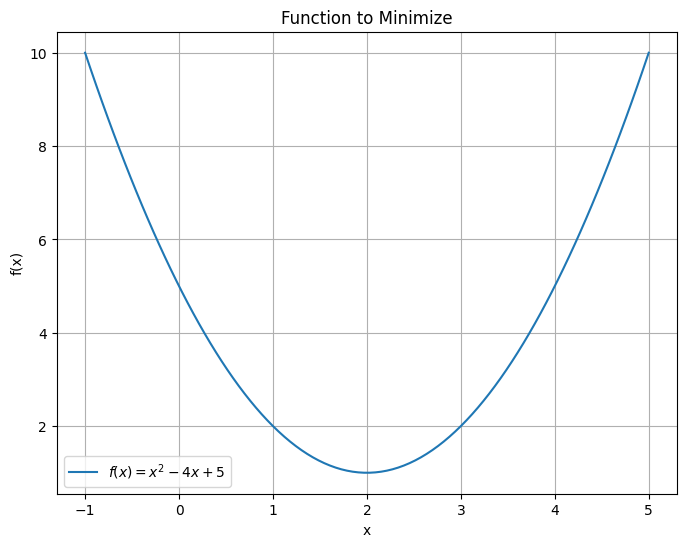

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def func(x):
    return x**2 - 4*x + 5

# Define the gradient of the function
def gradient(x):
    return 2*x - 4

# Plot the function for visualization
x_vals = np.linspace(-1, 5, 100)
y_vals = func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - 4x + 5$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function to Minimize')
plt.grid(True)
plt.legend()
plt.show()

### Batch Gradient Descent (BGD) Example

In Batch Gradient Descent, the gradient is calculated using the *entire* dataset for each update. For our simple 1D function, this means we calculate the gradient at the current `x` and update `x`.

Initial x: 0.00, f(x): 5.00
Iteration 5: x = 1.34, f(x) = 1.43
Iteration 10: x = 1.79, f(x) = 1.05
Iteration 15: x = 1.93, f(x) = 1.00
Iteration 20: x = 1.98, f(x) = 1.00

Final x (BGD): 1.98, f(x): 1.00


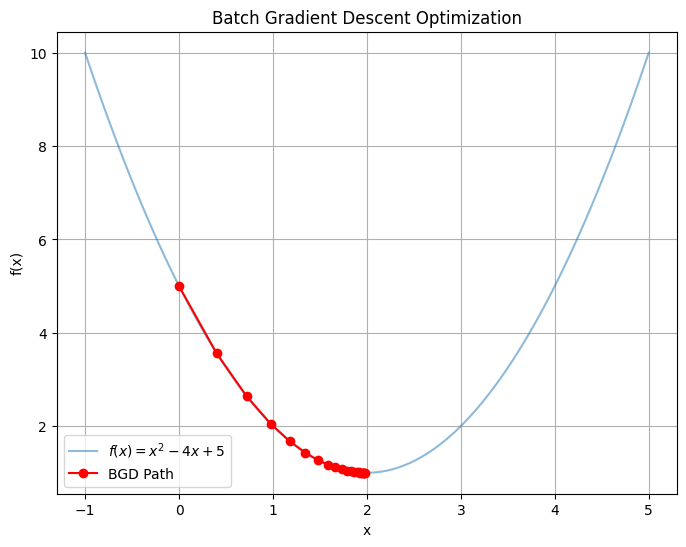

In [88]:
# Initial parameters
x_bgd = 0.0
learning_rate_bgd = 0.1
iterations_bgd = 20

x_history_bgd = [x_bgd]
loss_history_bgd = [func(x_bgd)]

print(f"Initial x: {x_bgd:.2f}, f(x): {func(x_bgd):.2f}")

for i in range(iterations_bgd):
    # Calculate gradient using the 'entire dataset' (which is just x_bgd for 1D)
    grad = gradient(x_bgd)

    # Update x
    x_bgd = x_bgd - learning_rate_bgd * grad

    x_history_bgd.append(x_bgd)
    loss_history_bgd.append(func(x_bgd))

    if (i + 1) % 5 == 0:
        print(f"Iteration {i+1}: x = {x_bgd:.2f}, f(x) = {func(x_bgd):.2f}")

print(f"\nFinal x (BGD): {x_bgd:.2f}, f(x): {func(x_bgd):.2f}")

# Plot the optimization path
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - 4x + 5$', alpha=0.5)
plt.plot(x_history_bgd, loss_history_bgd, 'ro-', label='BGD Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Batch Gradient Descent Optimization')
plt.grid(True)
plt.legend()
plt.show()

#Program 2

In [89]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])


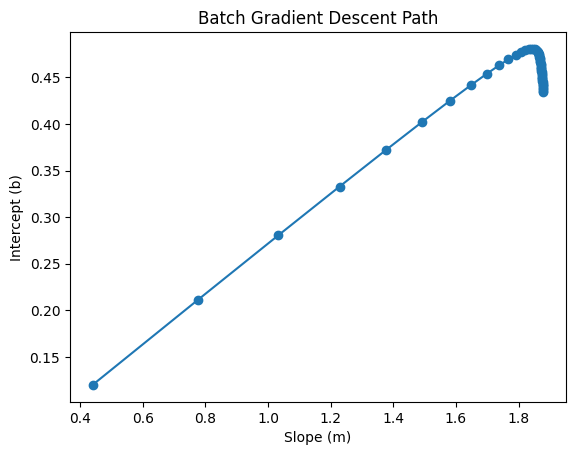

In [90]:
m, b = 0, 0
lr = 0.01
epochs = 50
n = len(X)

m_path, b_path = [], []

for _ in range(epochs):
    y_pred = m * X + b
    dm = (-2/n) * sum(X * (y - y_pred))
    db = (-2/n) * sum(y - y_pred)

    m -= lr * dm
    b -= lr * db

    m_path.append(m)
    b_path.append(b)

# Plot parameter updates
plt.figure()
plt.plot(m_path, b_path, marker='o')
plt.xlabel("Slope (m)")
plt.ylabel("Intercept (b)")
plt.title("Batch Gradient Descent Path")
plt.show()


This cell initializes the dataset `X` (features) and `y` (target) using NumPy arrays. `X` contains the input values `[1, 2, 3, 4, 5]` and `y` contains the corresponding target values `[2, 4, 6, 8, 10]`. This simple linear dataset ($y = 2x$) is used to demonstrate how the gradient descent algorithms find the best-fit line (parameters `m` and `b`) for this data.

This code implements **Batch Gradient Descent (BGD)** for linear regression:

*   **Initialization:** `m` and `b` (slope and intercept) are initialized to 0. `lr` (learning rate) is set to 0.01, `epochs` (number of full training passes) is 50, and `n` is the number of data points. `m_path` and `b_path` lists store the historical values of `m` and `b` for plotting.
*   **Training Loop:** The outer loop runs for `epochs` times. In each epoch:
    *   `y_pred` is calculated using the current `m` and `b` for the *entire dataset* `X`.
    *   The gradients `dm` (for `m`) and `db` (for `b`) are computed by averaging the errors over the *entire dataset*. These are the derivatives of the Mean Squared Error (MSE) cost function with respect to `m` and `b`.
    *   `m` and `b` are updated by taking a step in the opposite direction of their respective gradients, scaled by the `learning_rate`.
*   **Plotting:** A plot visualizes the path taken by the `(m, b)` parameters in the parameter space over the epochs. This path shows how the model converges towards the optimal slope and intercept values that minimize the loss function for the given data.

This cell implements **Stochastic Gradient Descent (SGD)** for linear regression:

*   **Initialization:** Similar to BGD, `m`, `b`, `lr`, and `epochs` are initialized. However, `epochs` is often higher for SGD to allow more frequent updates.
*   **Training Loop:** The outer loop runs for `epochs`. The key difference is the inner loop, which iterates through *each individual data point* (`X[i]`, `y[i]`). For each point:
    *   `y_pred` is calculated for that *single data point*.
    *   The gradients `dm` and `db` are computed based on the error of that *single data point*.
    *   `m` and `b` are updated immediately after processing each data point.
*   **Plotting:** The plot shows the path of `m` and `b` in the parameter space. Due to the frequent and noisy updates (based on just one data point at a time), the path typically appears more "zig-zag" or erratic compared to BGD, reflecting the higher variance of SGD's updates. Despite the noise, it eventually converges towards the optimal parameters.

### Stochastic Gradient Descent (SGD) Example

In Stochastic Gradient Descent, the gradient is calculated and parameters are updated for *each individual data point*. To simulate this for our 1D function, we'll introduce some noise to the gradient calculation to represent the variability of individual data points.

Initial x: 0.00, f(x): 5.00
Iteration 20: x = 1.53, f(x) = 1.22
Iteration 40: x = 2.10, f(x) = 1.01
Iteration 60: x = 1.61, f(x) = 1.15
Iteration 80: x = 2.22, f(x) = 1.05
Iteration 100: x = 2.30, f(x) = 1.09

Final x (SGD): 2.30, f(x): 1.09


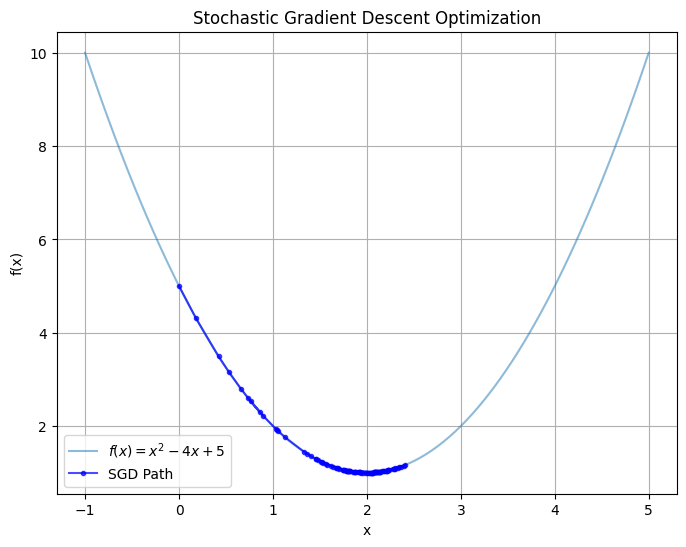

In [91]:
# Initial parameters
x_sgd = 0.0
learning_rate_sgd = 0.05
iterations_sgd = 100 # More iterations needed due to noisy updates

x_history_sgd = [x_sgd]
loss_history_sgd = [func(x_sgd)]

print(f"Initial x: {x_sgd:.2f}, f(x): {func(x_sgd):.2f}")

for i in range(iterations_sgd):
    # Simulate 'single data point' by adding noise to the gradient
    noise = np.random.normal(0, 2) # Adding Gaussian noise
    grad = gradient(x_sgd) + noise

    # Update x
    x_sgd = x_sgd - learning_rate_sgd * grad

    x_history_sgd.append(x_sgd)
    loss_history_sgd.append(func(x_sgd))

    if (i + 1) % 20 == 0:
        print(f"Iteration {i+1}: x = {x_sgd:.2f}, f(x) = {func(x_sgd):.2f}")

print(f"\nFinal x (SGD): {x_sgd:.2f}, f(x): {func(x_sgd):.2f}")

# Plot the optimization path
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - 4x + 5$', alpha=0.5)
plt.plot(x_history_sgd, loss_history_sgd, 'bo-', markersize=3, label='SGD Path', alpha=0.7)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Stochastic Gradient Descent Optimization')
plt.grid(True)
plt.legend()
plt.show()

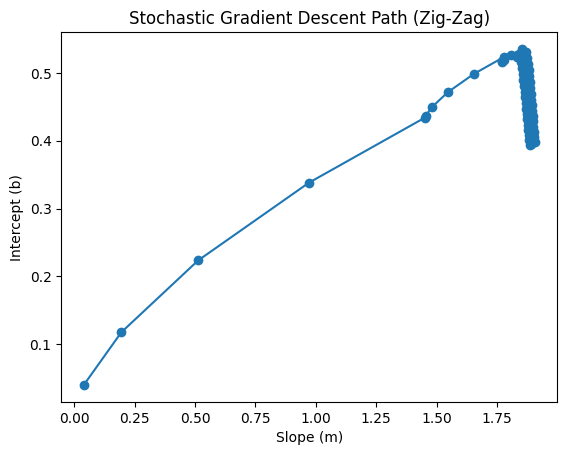

In [92]:
m, b = 0, 0
lr = 0.01
epochs = 20

m_path, b_path = [], []

for _ in range(epochs):
    for i in range(len(X)):
        y_pred = m * X[i] + b
        dm = -2 * X[i] * (y[i] - y_pred)
        db = -2 * (y[i] - y_pred)

        m -= lr * dm
        b -= lr * db

        m_path.append(m)
        b_path.append(b)

# Plot
plt.figure()
plt.plot(m_path, b_path, marker='o')
plt.xlabel("Slope (m)")
plt.ylabel("Intercept (b)")
plt.title("Stochastic Gradient Descent Path (Zig-Zag)")
plt.show()


### Mini-Batch Gradient Descent (MBGD) Example

Mini-Batch Gradient Descent strikes a balance by calculating the gradient using a small *mini-batch* of data points. For our 1D function, we can simulate this by averaging the gradients from a small number of noisy samples.

Initial x: 0.00, f(x): 5.00
Iteration 10: x = 1.79, f(x) = 1.05
Iteration 20: x = 2.07, f(x) = 1.01
Iteration 30: x = 2.03, f(x) = 1.00
Iteration 40: x = 2.07, f(x) = 1.00
Iteration 50: x = 2.12, f(x) = 1.01

Final x (MBGD): 2.12, f(x): 1.01


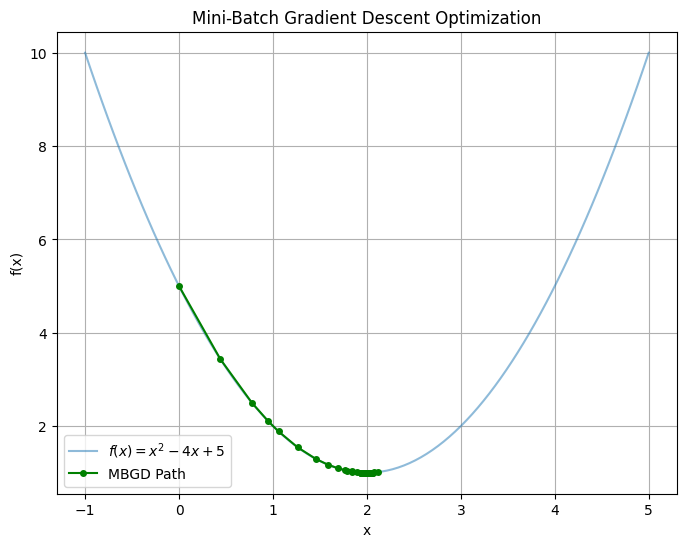

In [93]:
# Initial parameters
x_mbgd = 0.0
learning_rate_mbgd = 0.1
iterations_mbgd = 50
mini_batch_size = 5 # Number of 'samples' in each mini-batch

x_history_mbgd = [x_mbgd]
loss_history_mbgd = [func(x_mbgd)]

print(f"Initial x: {x_mbgd:.2f}, f(x): {func(x_mbgd):.2f}")

for i in range(iterations_mbgd):
    # Simulate mini-batch: average gradients from multiple noisy samples
    grads_in_batch = []
    for _ in range(mini_batch_size):
        noise = np.random.normal(0, 1) # Less noise than SGD for individual points
        grads_in_batch.append(gradient(x_mbgd) + noise)

    grad_average = np.mean(grads_in_batch)

    # Update x
    x_mbgd = x_mbgd - learning_rate_mbgd * grad_average

    x_history_mbgd.append(x_mbgd)
    loss_history_mbgd.append(func(x_mbgd))

    if (i + 1) % 10 == 0:
        print(f"Iteration {i+1}: x = {x_mbgd:.2f}, f(x) = {func(x_mbgd):.2f}")

print(f"\nFinal x (MBGD): {x_mbgd:.2f}, f(x): {func(x_mbgd):.2f}")

# Plot the optimization path
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - 4x + 5$', alpha=0.5)
plt.plot(x_history_mbgd, loss_history_mbgd, 'go-', markersize=4, label='MBGD Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Mini-Batch Gradient Descent Optimization')
plt.grid(True)
plt.legend()
plt.show()

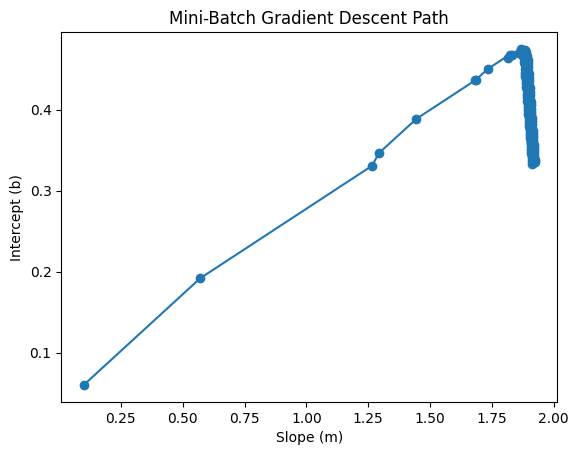

In [94]:
m, b = 0, 0
lr = 0.01
epochs = 40
batch_size = 2

m_path, b_path = [], []

for _ in range(epochs):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]

        y_pred = m * X_batch + b
        dm = (-2/len(X_batch)) * sum(X_batch * (y_batch - y_pred))
        db = (-2/len(X_batch)) * sum(y_batch - y_pred)

        m -= lr * dm
        b -= lr * db

        m_path.append(m)
        b_path.append(b)

# Plot
plt.figure()
plt.plot(m_path, b_path, marker='o')
plt.xlabel("Slope (m)")
plt.ylabel("Intercept (b)")
plt.title("Mini-Batch Gradient Descent Path")
plt.show()


This cell implements **Mini-Batch Gradient Descent (MBGD)** for linear regression:

*   **Initialization:** Similar to the other methods, but introduces `batch_size` (here, 2), which determines the number of samples included in each mini-batch for gradient calculation.
*   **Training Loop:** The outer loop runs for `epochs`. The inner loop iterates through the dataset in chunks of `batch_size`.
    *   For each mini-batch, `X_batch` and `y_batch` are extracted.
    *   `y_pred` is calculated for the current mini-batch.
    *   The gradients `dm` and `db` are computed as the average over the *mini-batch* of data points.
    *   `m` and `b` are updated based on these mini-batch gradients.
*   **Plotting:** The plot shows the path of `m` and `b`. This path is generally smoother than SGD (because gradients are averaged over a small batch, reducing noise) but less perfectly smooth than BGD (because it's not using the entire dataset for each update). This illustrates MBGD's effective balance between the stability of BGD and the efficiency of SGD.

#Batch Gradient

In [95]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [96]:
X,y=load_diabetes(return_X_y=True)

In [97]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [100]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [101]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [102]:
X_train.shape

(353, 10)

In [103]:
import numpy as np

class GDRegressor:

    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef = None
        self.intercept = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        # init your coefs
        self.intercept = 0
        self.coef = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # predictions
            y_pred = np.dot(X_train, self.coef) + self.intercept

            # gradients
            d_intercept = (-2 / X_train.shape[0]) * np.sum(y_train - y_pred)
            d_coef = (-2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

            # update all the coef and intercept
            self.intercept = self.intercept - self.lr * d_intercept
            self.coef = self.coef - self.lr * d_coef

        print(self.intercept, self.coef)

    def predict(self, X_test):
        return np.dot(X_test, self.coef) + self.intercept


This code defines a custom `GDRegressor` class that implements Batch Gradient Descent for linear regression. Here's a breakdown:

**1. `__init__` Method (Constructor):**
```python
def __init__(self, learning_rate=0.01, epochs=100):
    self.coef = None
    self.intercept = None
    self.lr = learning_rate
    self.epochs = epochs
```
*   This is the constructor for our `GDRegressor` class. It initializes the hyperparameters that control the gradient descent process.
*   `learning_rate` (default `0.01`): This determines the step size at each iteration while moving towards a minimum of the loss function. A smaller value means slower learning but potentially better convergence, while a larger value means faster learning but risks overshooting or diverging.
*   `epochs` (default `100`): This is the number of complete passes through the entire training dataset. Each epoch involves calculating the gradient and updating the model parameters.
*   `self.coef = None` and `self.intercept = None`: These attributes will store the learned coefficients (slope) and intercept of the linear model after the `fit` method is called.

**2. `fit` Method (Training the Model):**
```python
def fit(self, X_train, y_train):
    # init your coefs
    self.intercept = 0
    self.coef = np.ones(X_train.shape[1])

    for i in range(self.epochs):
        # predictions
        y_pred = np.dot(X_train, self.coef) + self.intercept

        # gradients
        d_intercept = (-2 / X_train.shape[0]) * np.sum(y_train - y_pred)
        d_coef = (-2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

        # update all the coef and intercept
        self.intercept = self.intercept - self.lr * d_intercept
        self.coef = self.coef - self.lr * d_coef

    print(self.intercept, self.coef)
```
*   This method is responsible for training the linear regression model using Batch Gradient Descent.
*   `self.intercept = 0` and `self.coef = np.ones(X_train.shape[1])`: Before training begins, the intercept is initialized to 0, and the coefficients are initialized to an array of ones. The size of the `coef` array matches the number of features in `X_train`.
*   `for i in range(self.epochs):`: This loop iterates for the specified number of `epochs`. In each epoch, the model processes the *entire* training dataset.
    *   `y_pred = np.dot(X_train, self.coef) + self.intercept`: This line calculates the predicted `y` values (`y_pred`) for the *entire* `X_train` dataset using the current `coef` and `intercept`. This is the core linear regression equation: $y_{pred} = X \cdot coef + intercept$.
    *   `d_intercept = (-2 / X_train.shape[0]) * np.sum(y_train - y_pred)`: This calculates the gradient of the Mean Squared Error (MSE) loss function with respect to the `intercept`. It averages the error over all training examples.
    *   `d_coef = (-2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))`: This calculates the gradient of the MSE loss function with respect to the `coef` (weights). It performs a dot product of the transposed `X_train` with the error term, effectively averaging the gradient contribution for each feature across all training examples.
    *   `self.intercept = self.intercept - self.lr * d_intercept`: The `intercept` is updated by subtracting the learning rate multiplied by its gradient. This moves the intercept in the direction that reduces the loss.
    *   `self.coef = self.coef - self.lr * d_coef`: Similarly, the `coef` (weights) are updated using their respective gradients and the learning rate. This adjusts the slopes for each feature to minimize the loss.
*   `print(self.intercept, self.coef)`: After all epochs are completed, the final learned `intercept` and `coef` values are printed.

**3. `predict` Method (Making Predictions):**
```python
def predict(self, X_test):
    return np.dot(X_test, self.coef) + self.intercept
```
*   This method is used to make predictions on new, unseen data (`X_test`) after the model has been trained.
*   It applies the same linear equation ($y_{pred} = X \cdot coef + intercept$) using the learned `self.coef` and `self.intercept` to the input `X_test` to generate `y_pred` values.

In [104]:
gdr=GDRegressor(learning_rate=0.5,epochs=1000)

In [105]:
gdr.fit(X_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [106]:
y_pred=gdr.predict(X_test)

In [107]:
r2_score(y_test,y_pred)

0.4534503034722803

#Program 2

In [108]:
import numpy as np
import matplotlib.pyplot as plt

class GDRegressor:

    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef = None
        self.intercept = None
        self.lr = learning_rate
        self.epochs = epochs
        self.losses = []   # <-- added only for visualization

    def fit(self, X_train, y_train):
        # BEFORE FIT
        self.intercept = 0
        self.coef = np.ones(X_train.shape[1])

        print("BEFORE FIT")
        print("Intercept:", self.intercept)
        print("Coef:", self.coef)
        print("-" * 30)

        for i in range(self.epochs):
            # prediction
            y_pred = np.dot(X_train, self.coef) + self.intercept

            # loss (MSE)
            loss = np.mean((y_train - y_pred) ** 2)
            self.losses.append(loss)

            # gradients
            d_intercept = (-2 / X_train.shape[0]) * np.sum(y_train - y_pred)
            d_coef = (-2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

            # update
            self.intercept -= self.lr * d_intercept
            self.coef -= self.lr * d_coef

        print("AFTER FIT")
        print("Intercept:", self.intercept)
        print("Coef:", self.coef)

    def predict(self, X_test):
        return np.dot(X_test, self.coef) + self.intercept


Let's break down the `GDRegressor` class line by line:

```python
import numpy as np
import matplotlib.pyplot as plt
```
*   `import numpy as np`: This line imports the `numpy` library, which is essential for numerical operations, especially array manipulations and calculations like dot products and mean, which are fundamental to gradient descent.
*   `import matplotlib.pyplot as plt`: This line imports the `matplotlib.pyplot` module, commonly aliased as `plt`. It's used here for plotting the loss curve over epochs, helping to visualize the training progress.

```python
class GDRegressor:
```
*   `class GDRegressor:`: This defines a new Python class named `GDRegressor`. This class will encapsulate the logic for our custom Batch Gradient Descent linear regression model.

**`__init__` Method (Constructor):**
```python
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef = None
        self.intercept = None
        self.lr = learning_rate
        self.epochs = epochs
        self.losses = []   # <-- added only for visualization
```
*   `def __init__(self, learning_rate=0.01, epochs=100):`: This is the constructor method of the class. It's called automatically when a new `GDRegressor` object is created. It takes `learning_rate` and `epochs` as parameters, with default values provided.
*   `self.coef = None`: Initializes an instance variable `coef` to `None`. This will store the learned coefficients (weights) of the linear model after training. It's `None` initially because the model hasn't learned yet.
*   `self.intercept = None`: Initializes an instance variable `intercept` to `None`. This will store the learned intercept (bias) of the linear model after training. It's `None` for the same reason as `self.coef`.
*   `self.lr = learning_rate`: Stores the `learning_rate` passed during object creation into an instance variable `self.lr`. This hyperparameter controls the step size of parameter updates.
*   `self.epochs = epochs`: Stores the `epochs` (number of training iterations over the full dataset) into an instance variable `self.epochs`.
*   `self.losses = []`: Initializes an empty list `self.losses`. This list will be used to store the Mean Squared Error (MSE) loss calculated at the end of each epoch, allowing for plotting the loss curve later.

**`fit` Method (Training the Model):**
```python
    def fit(self, X_train, y_train):
        # BEFORE FIT
        self.intercept = 0
        self.coef = np.ones(X_train.shape[1])

        print("BEFORE FIT")
        print("Intercept:", self.intercept)
        print("Coef:", self.coef)
        print("-" * 30)

        for i in range(self.epochs):
            # prediction
            y_pred = np.dot(X_train, self.coef) + self.intercept

            # loss (MSE)
            loss = np.mean((y_train - y_pred) ** 2)
            self.losses.append(loss)

            # gradients
            d_intercept = (-2 / X_train.shape[0]) * np.sum(y_train - y_pred)
            d_coef = (-2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

            # update
            self.intercept -= self.lr * d_intercept
            self.coef -= self.lr * d_coef

        print("AFTER FIT")
        print("Intercept:", self.intercept)
        print("Coef:", self.coef)
```
*   `def fit(self, X_train, y_train):`: This method trains the linear regression model using the provided training data `X_train` (features) and `y_train` (target values).
*   `self.intercept = 0`: The intercept is initialized to 0 at the start of training.
*   `self.coef = np.ones(X_train.shape[1])`: The coefficients (weights) are initialized as a NumPy array of ones. The size of this array matches the number of features in `X_train` (`X_train.shape[1]`).
*   `print("BEFORE FIT")` and subsequent `print` statements: These lines are for debugging and educational purposes, showing the initial state of the `intercept` and `coef` before the gradient descent loop begins.
*   `for i in range(self.epochs):`: This is the main training loop. It iterates `self.epochs` times. In each iteration (epoch), the model processes the entire training dataset.
*   `y_pred = np.dot(X_train, self.coef) + self.intercept`: This calculates the predicted `y` values for all training examples. It performs a dot product of the feature matrix `X_train` with the current `coef` vector, and then adds the `intercept`. This is the linear regression equation: $\hat{y} = Xw + b$.
*   `loss = np.mean((y_train - y_pred) ** 2)`: This calculates the Mean Squared Error (MSE), which is a common loss function for linear regression. It's the average of the squared differences between the actual `y_train` values and the `y_pred` values.
*   `self.losses.append(loss)`: The calculated MSE loss for the current epoch is added to the `self.losses` list, to be used for plotting later.
*   `d_intercept = (-2 / X_train.shape[0]) * np.sum(y_train - y_pred)`: This calculates the gradient of the MSE loss function with respect to the `intercept` ($b$). The formula for the derivative of MSE with respect to $b$ is $-2/N \sum (y_i - \hat{y}_i)$.
*   `d_coef = (-2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))`: This calculates the gradient of the MSE loss function with respect to the `coef` vector ($w$). The formula for the derivative of MSE with respect to $w$ is $-2/N \sum X_i(y_i - \hat{y}_i)$, which is efficiently computed using a dot product of the transpose of `X_train` and the error term.
*   `self.intercept -= self.lr * d_intercept`: Updates the `intercept` by subtracting the `learning_rate` multiplied by its gradient. This moves the intercept in the direction that minimizes the loss.
*   `self.coef -= self.lr * d_coef`: Updates the `coef` (weights) by subtracting the `learning_rate` multiplied by their gradients. This adjusts the weights to minimize the loss.
*   `print("AFTER FIT")` and subsequent `print` statements: These lines display the final learned `intercept` and `coef` values after all epochs are completed.

**`predict` Method (Making Predictions):**
```python
    def predict(self, X_test):
        return np.dot(X_test, self.coef) + self.intercept
```
*   `def predict(self, X_test):`: This method takes new, unseen data `X_test` and uses the learned `coef` and `intercept` to make predictions.
*   `return np.dot(X_test, self.coef) + self.intercept`: It applies the same linear equation ($\hat{y} = Xw + b$) as in the `fit` method to compute and return the predicted `y` values for the `X_test` data.

In [109]:
# dataset
X = np.array([[5.5], [6.0], [6.5], [7.0], [7.5], [8.0]])
y = np.array([140, 145, 150, 155, 160, 165])

gd = GDRegressor(learning_rate=0.01, epochs=100)
gd.fit(X, y)


BEFORE FIT
Intercept: 0
Coef: [1.]
------------------------------
AFTER FIT
Intercept: 5.545725051573531
Coef: [21.58945324]


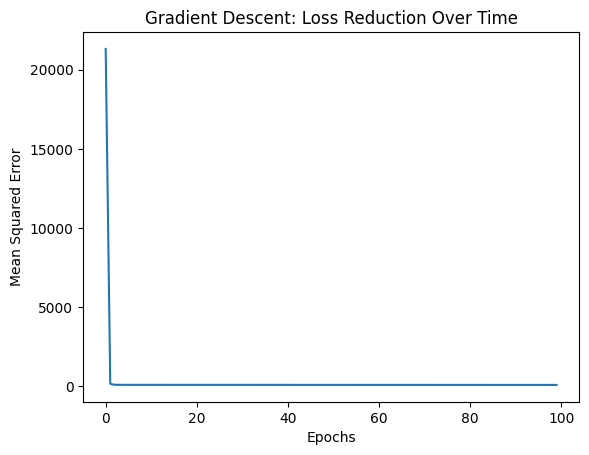

In [110]:
plt.plot(gd.losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent: Loss Reduction Over Time")
plt.show()


#Stochastic Gradient Descent

In [111]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[5.5], [6.0], [6.5], [7.0], [7.5], [8.0]])
y = np.array([140, 145, 150, 155, 160, 165])


In [112]:
class SGDRegressorCustom:

    def __init__(self, learning_rate=0.01, epochs=20):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None
        self.losses = []

    def fit(self, X_train, y_train):
        self.coef = np.ones(X_train.shape[1])
        self.intercept = 0

        for _ in range(self.epochs):
            for i in range(X_train.shape[0]):

                # single sample
                xi = X_train[i]
                yi = y_train[i]

                # prediction
                y_pred = np.dot(xi, self.coef) + self.intercept

                # loss
                loss = (yi - y_pred) ** 2
                self.losses.append(loss)

                # gradients (single point)
                d_intercept = -2 * (yi - y_pred)
                d_coef = -2 * xi * (yi - y_pred)

                # update
                self.intercept -= self.lr * d_intercept
                self.coef -= self.lr * d_coef

        print("Final Intercept:", self.intercept)
        print("Final Coef:", self.coef)

    def predict(self, X_test):
        return np.dot(X_test, self.coef) + self.intercept


Let's break down the `SGDRegressorCustom` class line by line:

```python
import numpy as np
import matplotlib.pyplot as plt
```
*   `import numpy as np`: Imports the NumPy library, essential for numerical operations and array manipulation.
*   `import matplotlib.pyplot as plt`: Imports Matplotlib's pyplot module, used for plotting, specifically for visualizing the loss curve.

```python
class SGDRegressorCustom:
```
*   `class SGDRegressorCustom:`: Defines a Python class named `SGDRegressorCustom` to encapsulate the logic for a custom Stochastic Gradient Descent linear regression model.

**`__init__` Method (Constructor):**
```python
    def __init__(self, learning_rate=0.01, epochs=20):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None
        self.losses = []
```
*   `def __init__(self, learning_rate=0.01, epochs=20):`: The constructor for the class, initializing the model's hyperparameters.
*   `self.lr = learning_rate`: Stores the learning rate, which dictates the step size for parameter updates.
*   `self.epochs = epochs`: Stores the number of full passes over the dataset. Note that for SGD, updates happen more frequently (per sample), so the total number of updates is `epochs * num_samples`.
*   `self.coef = None`: Initializes the `coef` (weights) to `None`, to be learned during training.
*   `self.intercept = None`: Initializes the `intercept` (bias) to `None`, to be learned during training.
*   `self.losses = []`: An empty list to store the squared error after each *individual sample update*, used for visualization.

**`fit` Method (Training the Model):**
```python
    def fit(self, X_train, y_train):
        self.coef = np.ones(X_train.shape[1])
        self.intercept = 0

        for _ in range(self.epochs):
            for i in range(X_train.shape[0]):
                
                # single sample
                xi = X_train[i]
                yi = y_train[i]

                # prediction
                y_pred = np.dot(xi, self.coef) + self.intercept

                # loss
                loss = (yi - y_pred) ** 2
                self.losses.append(loss)

                # gradients (single point)
                d_intercept = -2 * (yi - y_pred)
                d_coef = -2 * xi * (yi - y_pred)

                # update
                self.intercept -= self.lr * d_intercept
                self.coef -= self.lr * d_coef

        print("Final Intercept:", self.intercept)
        print("Final Coef:", self.coef)
```
*   `def fit(self, X_train, y_train):`: This method trains the model using the provided training data `X_train` and `y_train`.
*   `self.coef = np.ones(X_train.shape[1])`: Initializes `coef` as a NumPy array of ones, matching the number of features in `X_train`.
*   `self.intercept = 0`: Initializes the `intercept` to 0.
*   `for _ in range(self.epochs):`: The outer loop iterates for the specified number of `epochs`.
*   `for i in range(X_train.shape[0]):`: **This is the key difference for SGD.** An inner loop iterates through *each individual data point* in the training set.
*   `xi = X_train[i]`: Selects the `i`-th feature vector (single sample).
*   `yi = y_train[i]`: Selects the `i`-th target value (single sample).
*   `y_pred = np.dot(xi, self.coef) + self.intercept`: Calculates the prediction for *only the current single sample* `xi`.
*   `loss = (yi - y_pred) ** 2`: Calculates the squared error (a simple loss for a single sample) for the current prediction.
*   `self.losses.append(loss)`: Appends the calculated single-sample loss to the `losses` list.
*   `d_intercept = -2 * (yi - y_pred)`: Calculates the gradient of the squared error with respect to the `intercept` for *only the current single sample*.
*   `d_coef = -2 * xi * (yi - y_pred)`: Calculates the gradient of the squared error with respect to the `coef` for *only the current single sample*.
*   `self.intercept -= self.lr * d_intercept`: Updates the `intercept` immediately after processing *each single sample*.
*   `self.coef -= self.lr * d_coef`: Updates the `coef` immediately after processing *each single sample*.
*   `print("Final Intercept:", self.intercept)` and `print("Final Coef:", self.coef)`: After all epochs and samples are processed, the final learned parameters are printed.

**`predict` Method (Making Predictions):**
```python
    def predict(self, X_test):
        return np.dot(X_test, self.coef) + self.intercept
```
*   `def predict(self, X_test):`: This method takes new `X_test` data to make predictions.
*   `return np.dot(X_test, self.coef) + self.intercept`: Uses the learned `coef` and `intercept` to compute and return the predicted `y` values for the `X_test` data.

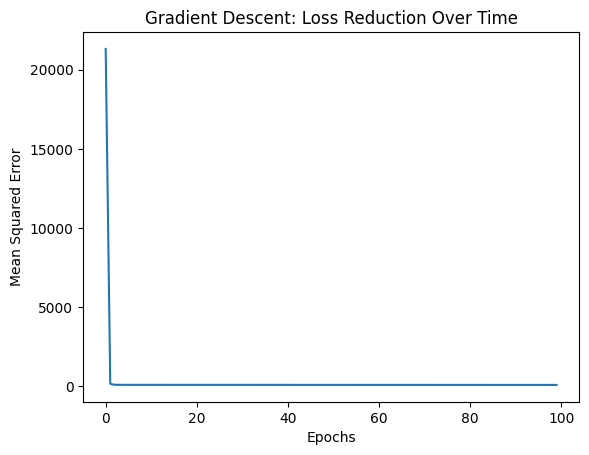

In [115]:
plt.plot(gd.losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent: Loss Reduction Over Time")
plt.show()

In [113]:
sgd = SGDRegressorCustom(learning_rate=0.01, epochs=15)
sgd.fit(X, y)


Final Intercept: 5.311841105109884
Final Coef: [19.79495082]


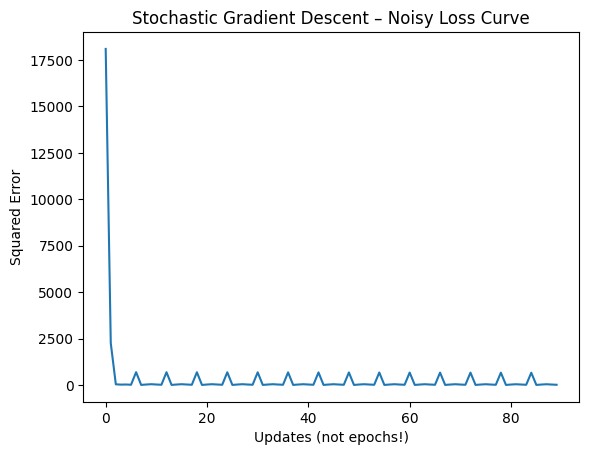

In [114]:
plt.plot(sgd.losses)
plt.xlabel("Updates (not epochs!)")
plt.ylabel("Squared Error")
plt.title("Stochastic Gradient Descent – Noisy Loss Curve")
plt.show()
